Creating Spark Dataframes

In [13]:
from pyspark.sql import SparkSession

# Initialize Spark Session
spark = SparkSession.builder.appName("create_spark_dfs").getOrCreate()
sc = spark.sparkContext

In [0]:
from pyspark.sql.types import StructType, StructField, StringType, IntegerType

sc.setJobDescription("Creating spark df using StructType")

# Define schema
schema = StructType([
    StructField("Name", StringType(), True),
    StructField("Age", IntegerType(), True),
    StructField("City", StringType(), True)
])

# Data
data = [("Alice", 30, "New York"), ("Bob", 25, "San Francisco")]

# Create DataFrame
df = spark.createDataFrame(data, schema=schema)
df.show()

+-----+---+-------------+
| Name|Age|         City|
+-----+---+-------------+
|Alice| 30|     New York|
|  Bob| 25|San Francisco|
+-----+---+-------------+



Query plan

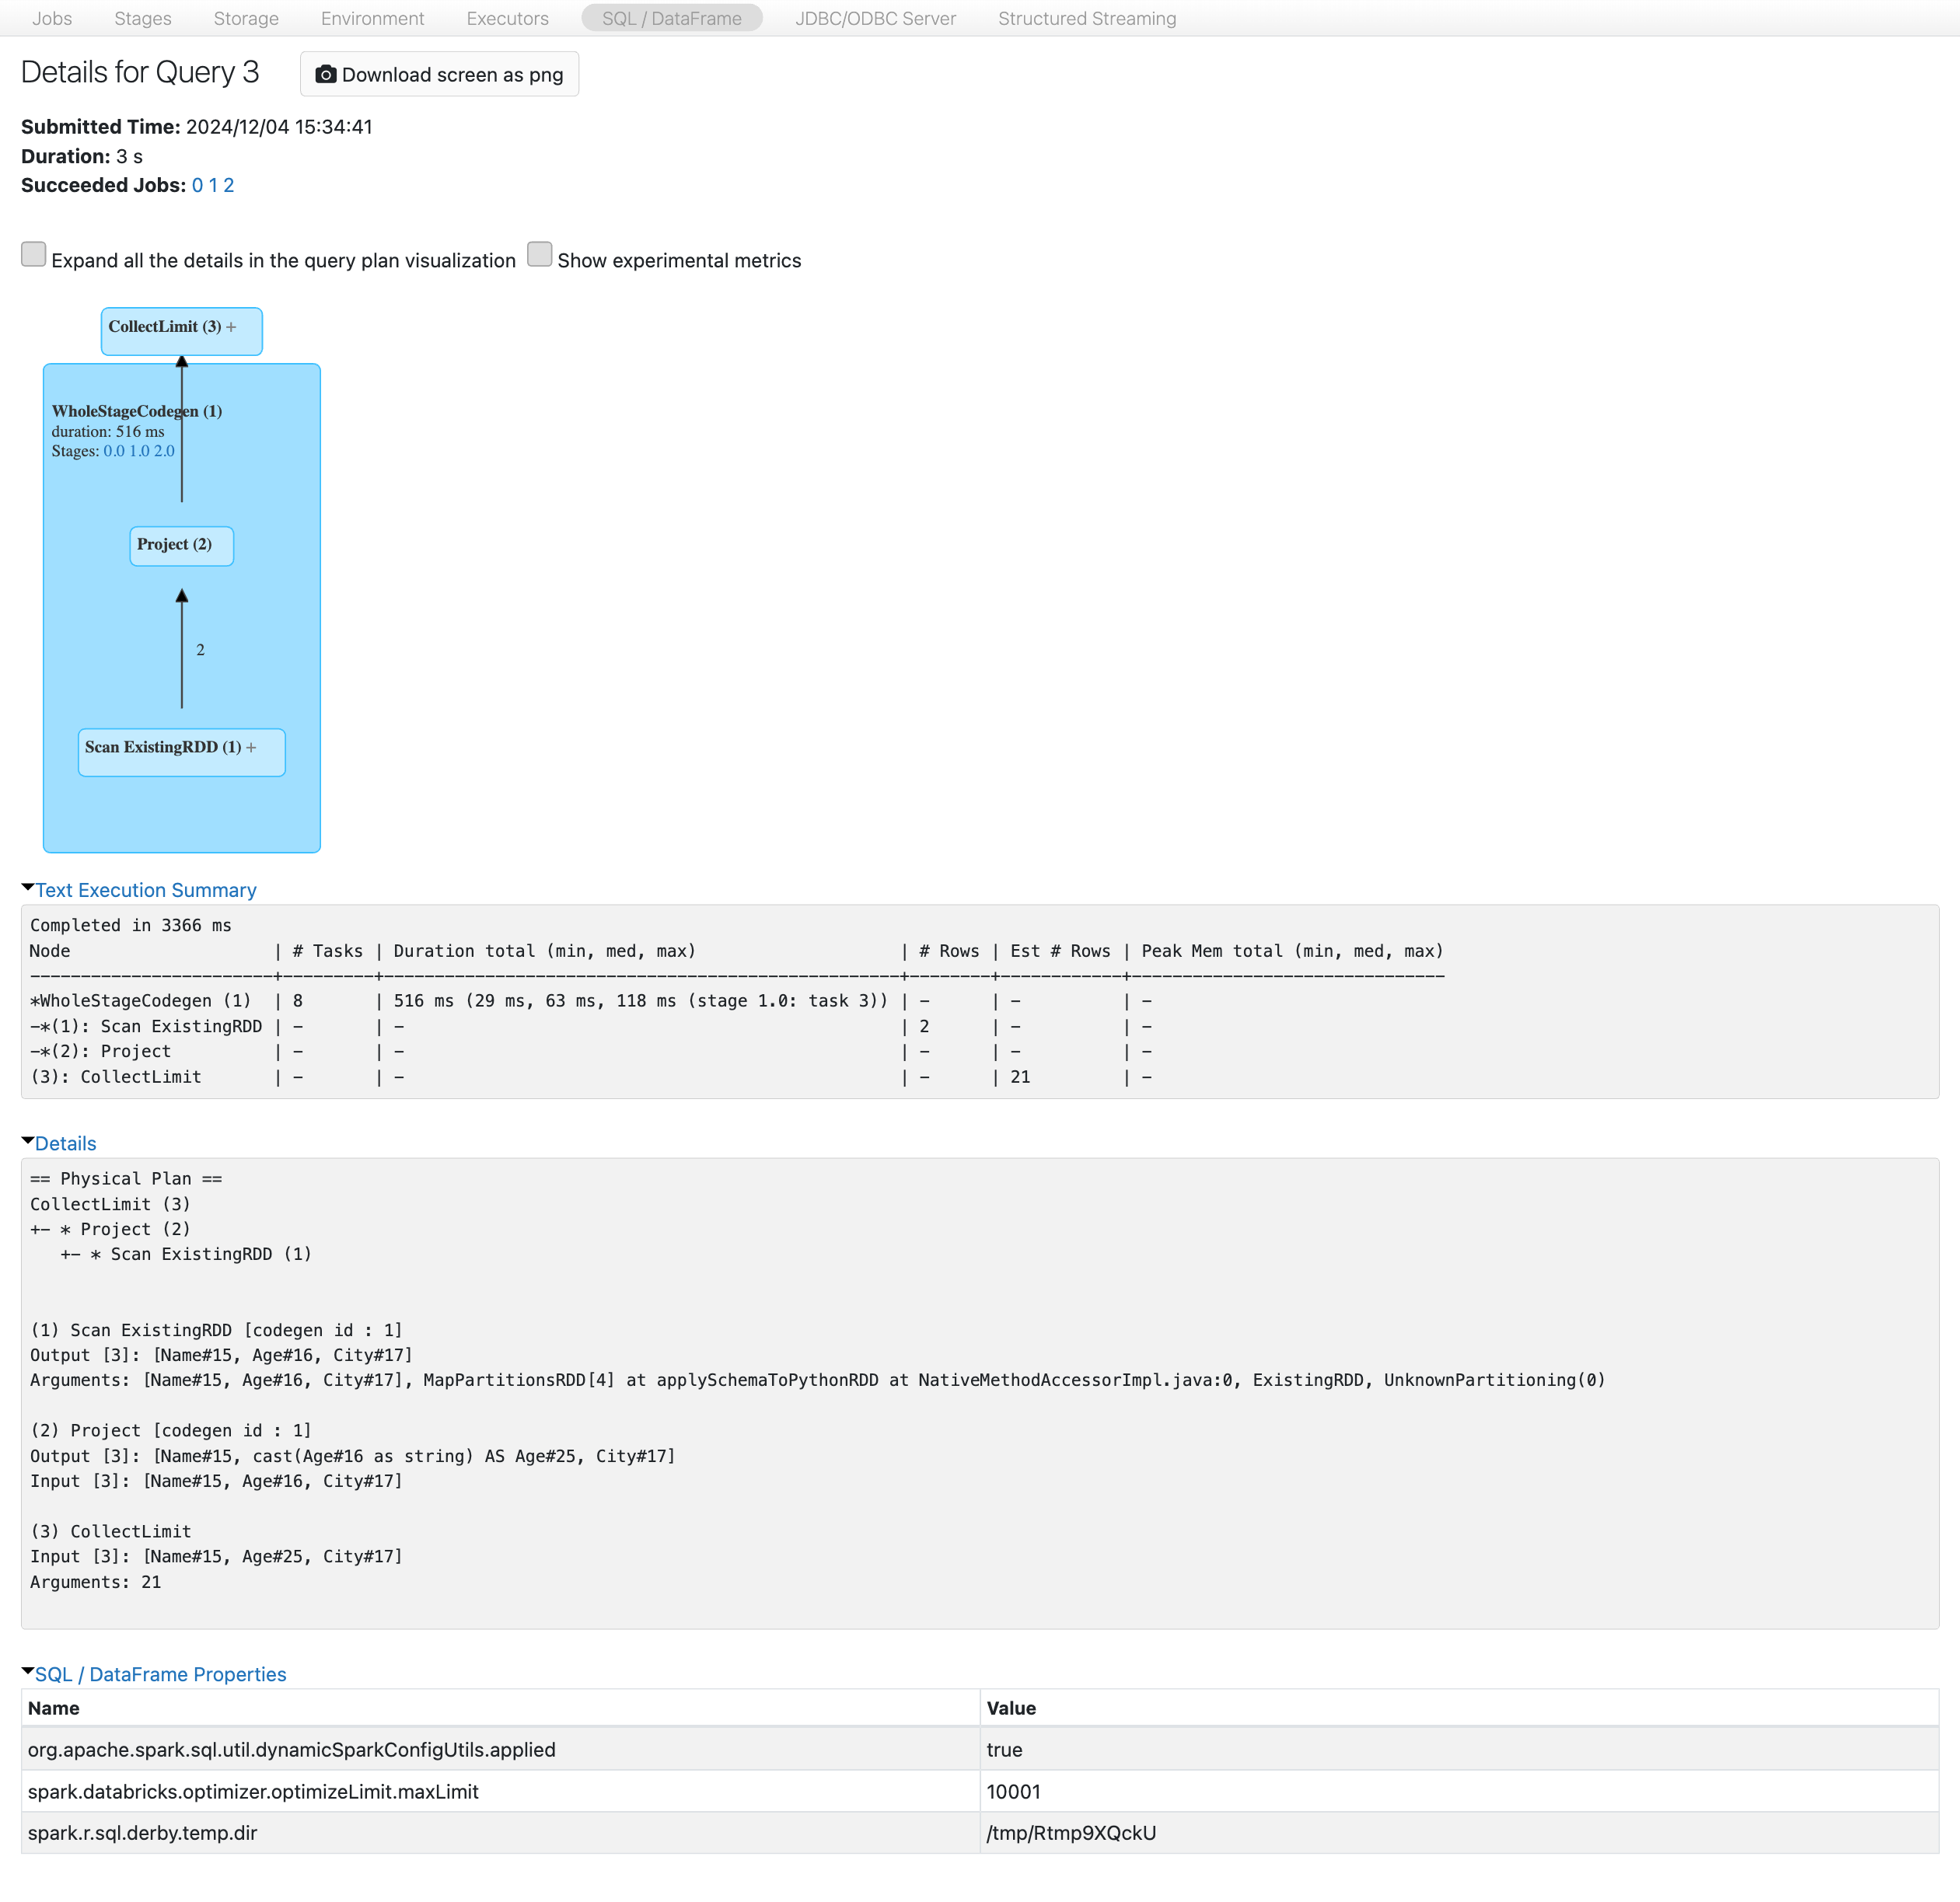

In [ ]:
from IPython.display import Image
Image(filename='UI_screenshots/creating_dfs/structype.png',width=1100,height=10)

- Job 0: Reading data from RDD
- Job 1: Applying projections - preparing data as columns
- Job 2: For show command

In [0]:
from pyspark.sql import Row

sc.setJobDescription("Creating spark df using Row")

# Data using Row
data = [
    Row(Name="Alice", Age=30, City="New York"),
    Row(Name="Bob", Age=25, City="San Francisco")
]

# Create DataFrame
df = spark.createDataFrame(data)
df.show()

+-----+---+-------------+
| Name|Age|         City|
+-----+---+-------------+
|Alice| 30|     New York|
|  Bob| 25|San Francisco|
+-----+---+-------------+



In [0]:
sc.setJobDescription("Creating spark df using Dict")

# Data as dictionaries
data = [
    {"Name": "Alice", "Age": 30, "City": "New York"},
    {"Name": "Bob", "Age": 25, "City": "San Francisco"}
]

# Create DataFrame
df = spark.createDataFrame(data)
df.show()

+---+-------------+-----+
|Age|         City| Name|
+---+-------------+-----+
| 30|     New York|Alice|
| 25|San Francisco|  Bob|
+---+-------------+-----+



In [0]:
import pandas as pd
sc.setJobDescription("Creating spark df using PandasDf")

# Pandas DataFrame
data = {"Name": ["Alice", "Bob"], "Age": [30, 25], "City": ["New York", "San Francisco"]}
pandas_df = pd.DataFrame(data)

# Convert to PySpark DataFrame
df = spark.createDataFrame(pandas_df)
df.show()

+-----+---+-------------+
| Name|Age|         City|
+-----+---+-------------+
|Alice| 30|     New York|
|  Bob| 25|San Francisco|
+-----+---+-------------+



In [ ]:
sc.setJobDescription("Creating spark df from external file")

df = spark.read.format('csv').option('header',"true").option('inferschema',"true").option("delimiter",'\t').load('data/reddit_sample.csv')
df.show()

+-----+----+---+-----+----+-----+------------+-----+-----------+
|flair|hour|day|month|year|title|num_comments|score|award_count|
+-----+----+---+-----+----+-----+------------+-----+-----------+
| Blog|   0|  5|    1|2022|    1|          13|  157|          0|
| Blog|   0| 12|    5|2021|    1|           5|  113|          0|
| Blog|   0| 15|    3|2022|    1|          12|   70|          0|
| Blog|   0| 22|    5|2023|    1|          33|  182|          0|
| Blog|   2| 15|    8|2021|    1|          36|  126|          0|
| Blog|   3| 19|   12|2023|    1|          11|   74|          0|
| Blog|   4|  1|    7|2023|    1|          21|   80|          0|
| Blog|   5| 13|    3|2023|    1|          53|   72|          0|
| Blog|   5| 23|    5|2022|    1|           3|   76|          0|
| Blog|   7| 10|   12|2022|    1|          26|   69|          0|
| Blog|   7| 14|    6|2023|    1|          15|  234|          0|
| Blog|   8|  5|    7|2023|    1|           7|   98|          0|
| Blog|   8| 12|   12|202

In [16]:
sc.setJobDescription("Creating spark df from external file with schema")
from pyspark.sql.types import StructType, StructField, StringType, IntegerType
# Define schema
schema = StructType([
    StructField("flair", StringType(), True),
    StructField("hour", IntegerType(), True),
    StructField("day", IntegerType(), True),
    StructField("month", IntegerType(), True),
    StructField("year", IntegerType(), True),
    StructField("title", IntegerType(), True),
    StructField("num_comments", IntegerType(), True),
    StructField("score", IntegerType(), True),
    StructField("award_count", IntegerType(), True),
])


df = spark.read.format('csv').option('header',"true").option('schema',schema).option("delimiter",'\t').load('data/reddit_sample.csv')
df.show()

+-----+----+---+-----+----+-----+------------+-----+-----------+
|flair|hour|day|month|year|title|num_comments|score|award_count|
+-----+----+---+-----+----+-----+------------+-----+-----------+
| Blog|   0|  5|    1|2022|    1|          13|  157|          0|
| Blog|   0| 12|    5|2021|    1|           5|  113|          0|
| Blog|   0| 15|    3|2022|    1|          12|   70|          0|
| Blog|   0| 22|    5|2023|    1|          33|  182|          0|
| Blog|   2| 15|    8|2021|    1|          36|  126|          0|
| Blog|   3| 19|   12|2023|    1|          11|   74|          0|
| Blog|   4|  1|    7|2023|    1|          21|   80|          0|
| Blog|   5| 13|    3|2023|    1|          53|   72|          0|
| Blog|   5| 23|    5|2022|    1|           3|   76|          0|
| Blog|   7| 10|   12|2022|    1|          26|   69|          0|
| Blog|   7| 14|    6|2023|    1|          15|  234|          0|
| Blog|   8|  5|    7|2023|    1|           7|   98|          0|
| Blog|   8| 12|   12|202

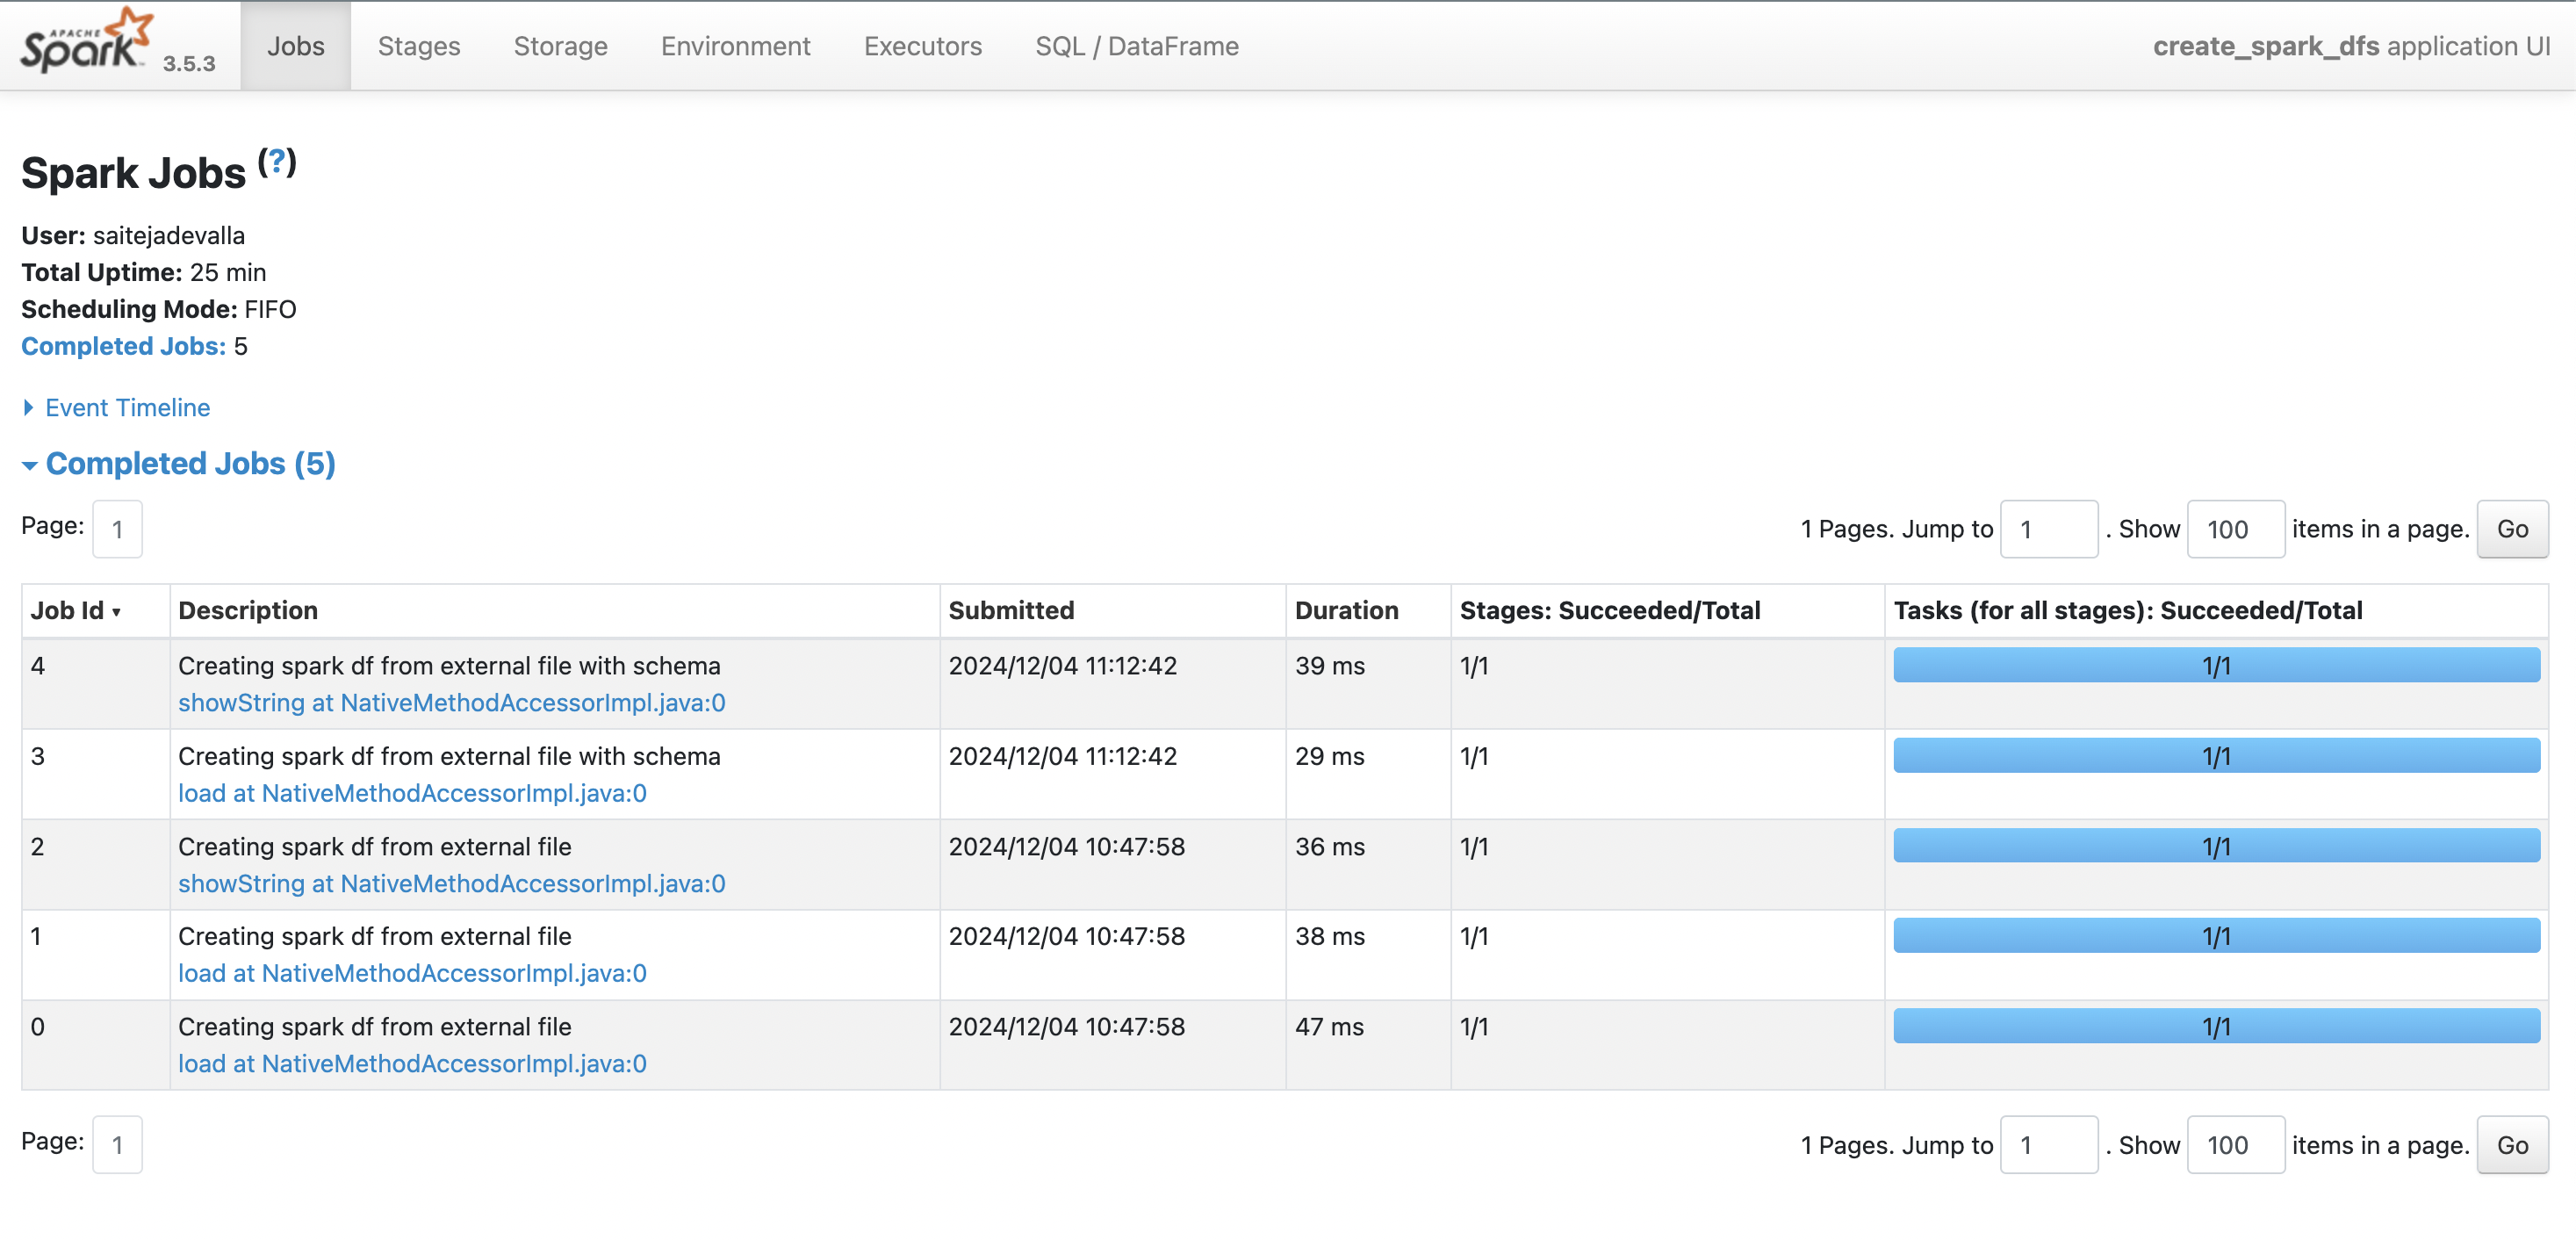

In [ ]:
from IPython.display import Image
Image(filename='UI_screenshots/creating_dfs/externalfilereadjobs.png',width=1100,height=10)

3 Jobs for df with spark schema inference = True   
- Job 0: Inferring schema - Spark scanning file as raw text to determine column types - focuses only on metadata  
- Job 1: Actual data load - reading using inferred schema and interpreting file into structured columns  
- Job 2: Display action - collecting rows to driver

SQL/DataFrame UI

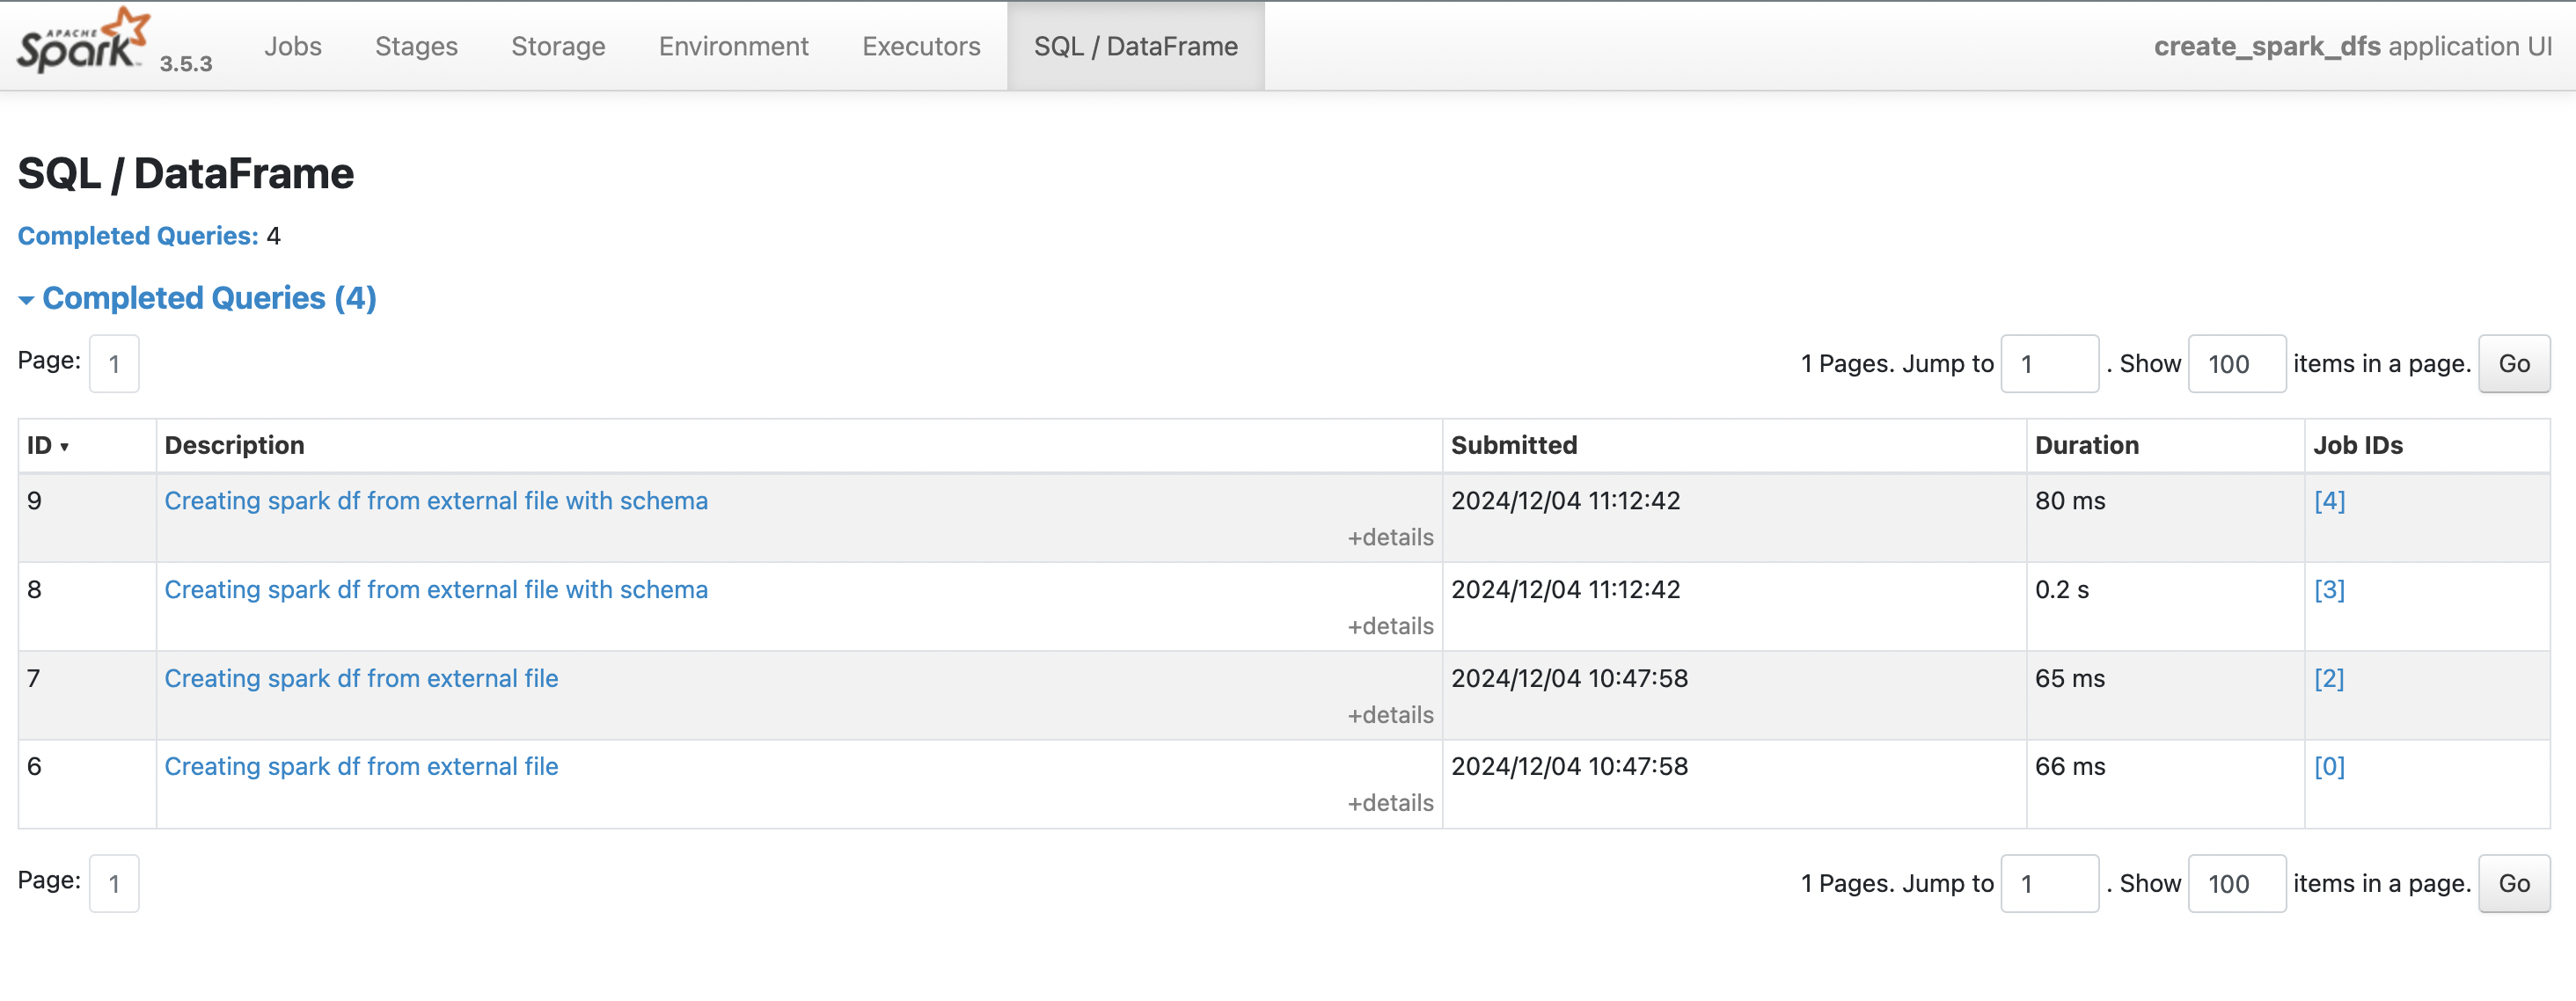

In [20]:
from IPython.display import Image
Image(filename='UI_screenshots/creating_dfs/SQLtab.png',width=1100,height=10)

Query Plans

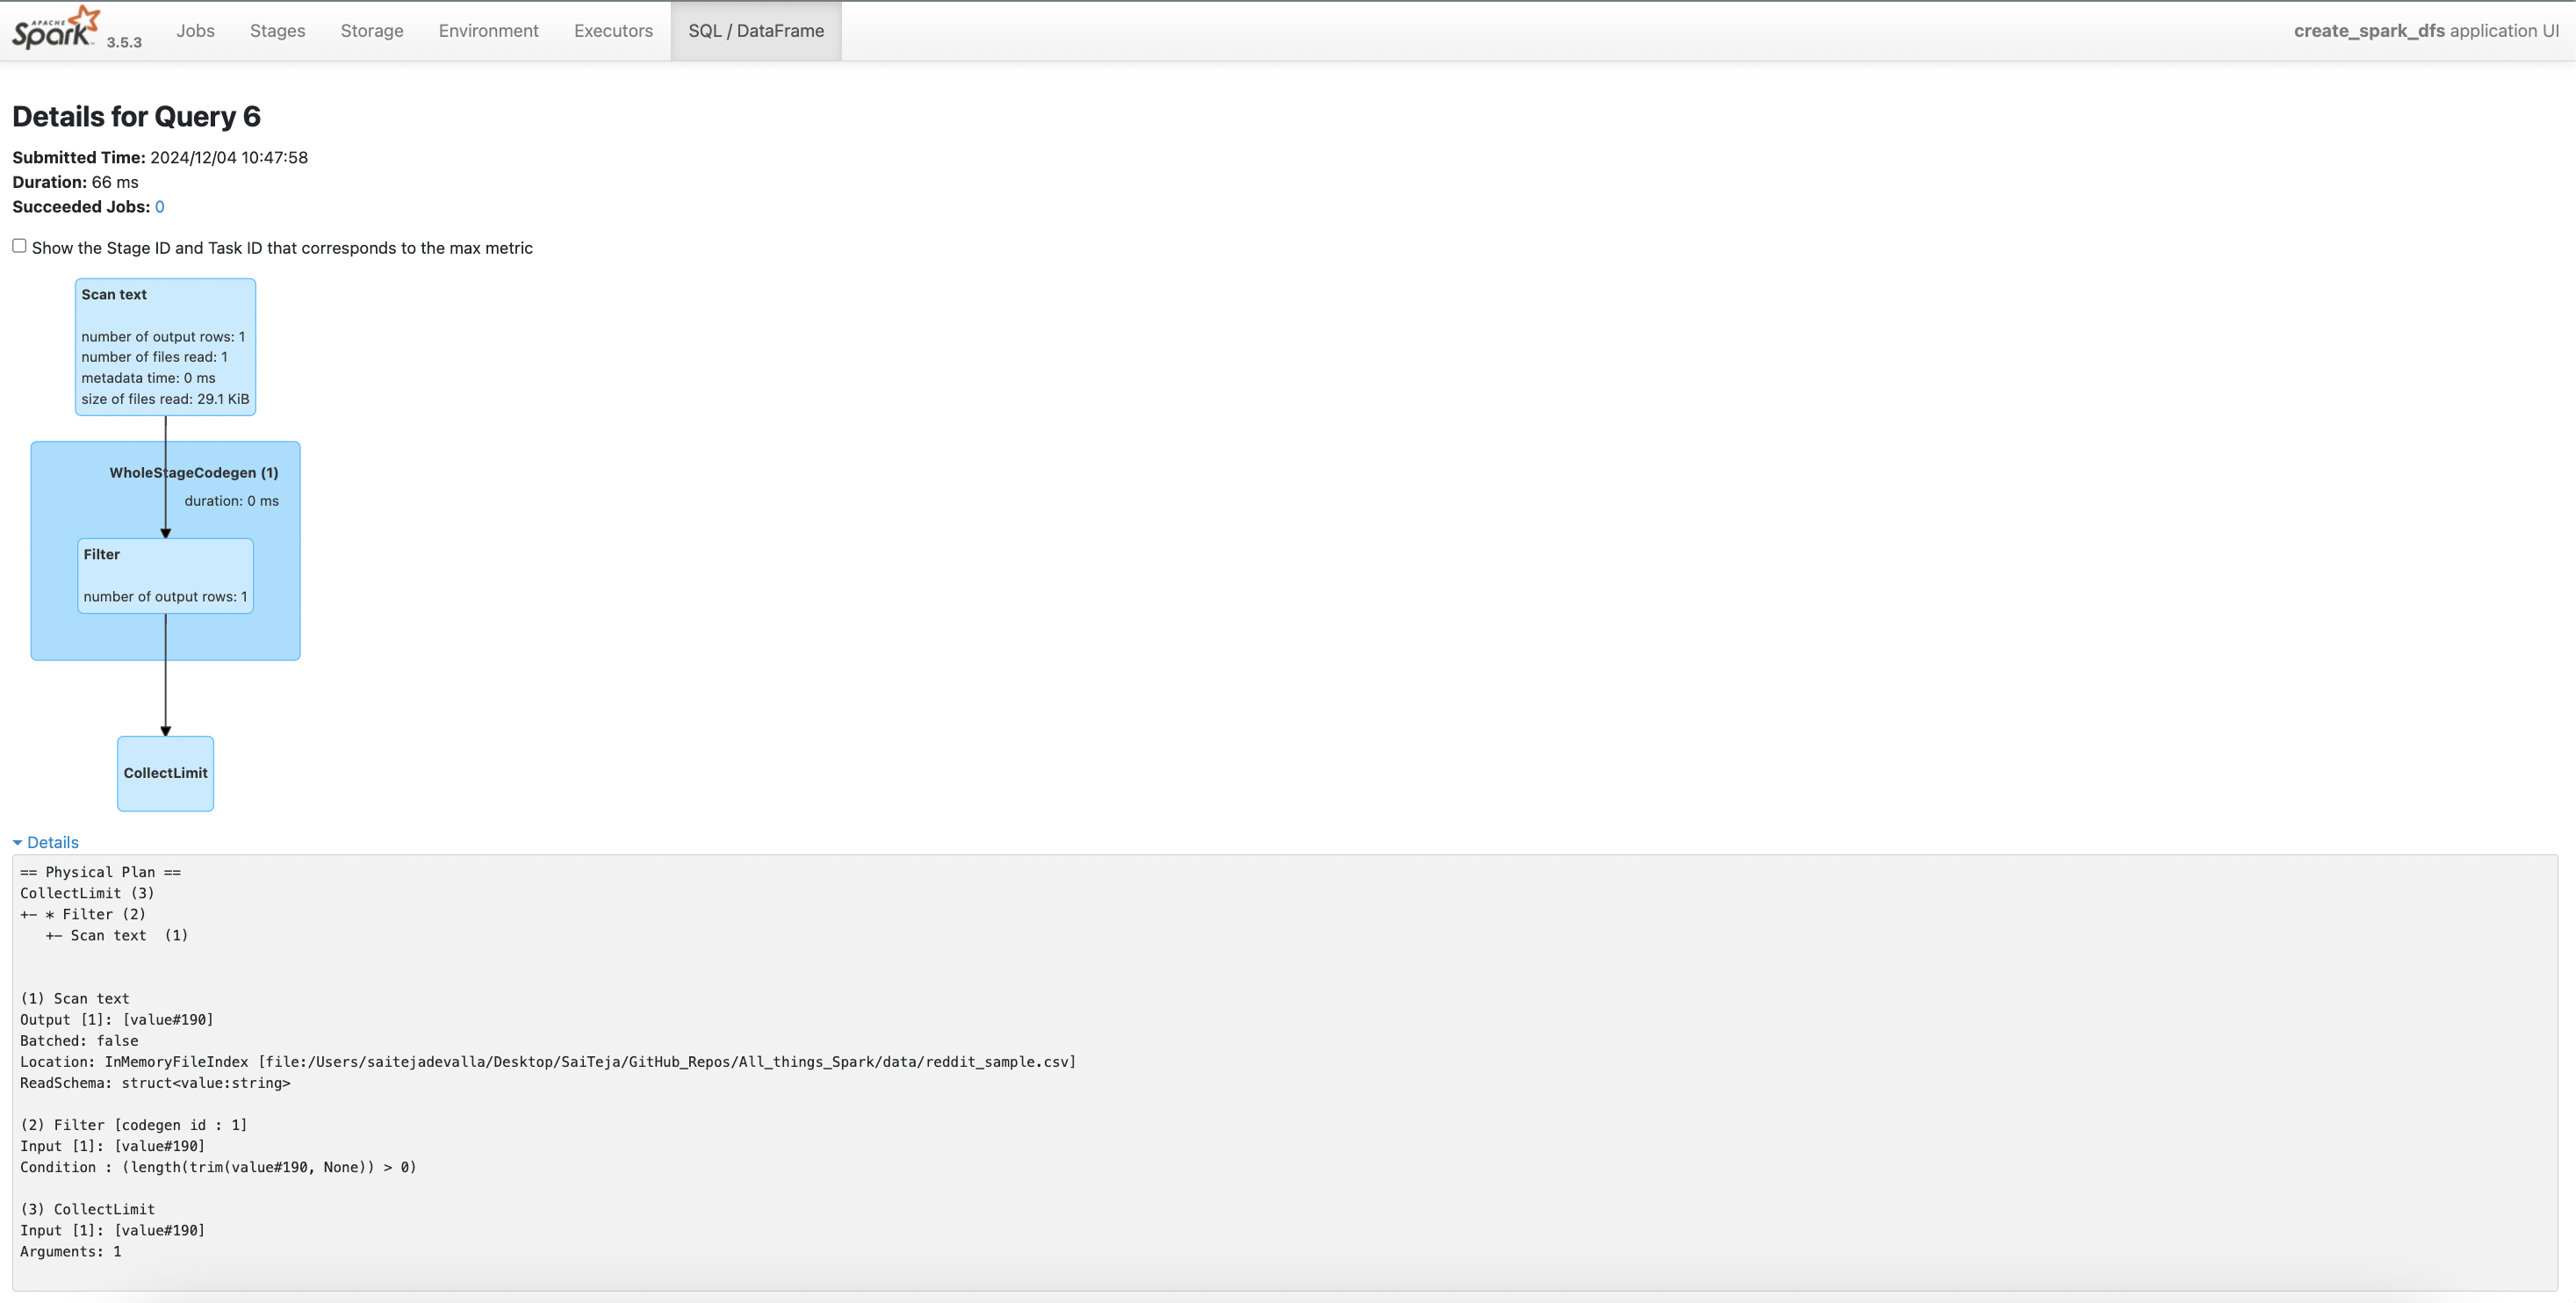

In [21]:
from IPython.display import Image
Image(filename='UI_screenshots/creating_dfs/df-1-1.png',width=1100,height=10)

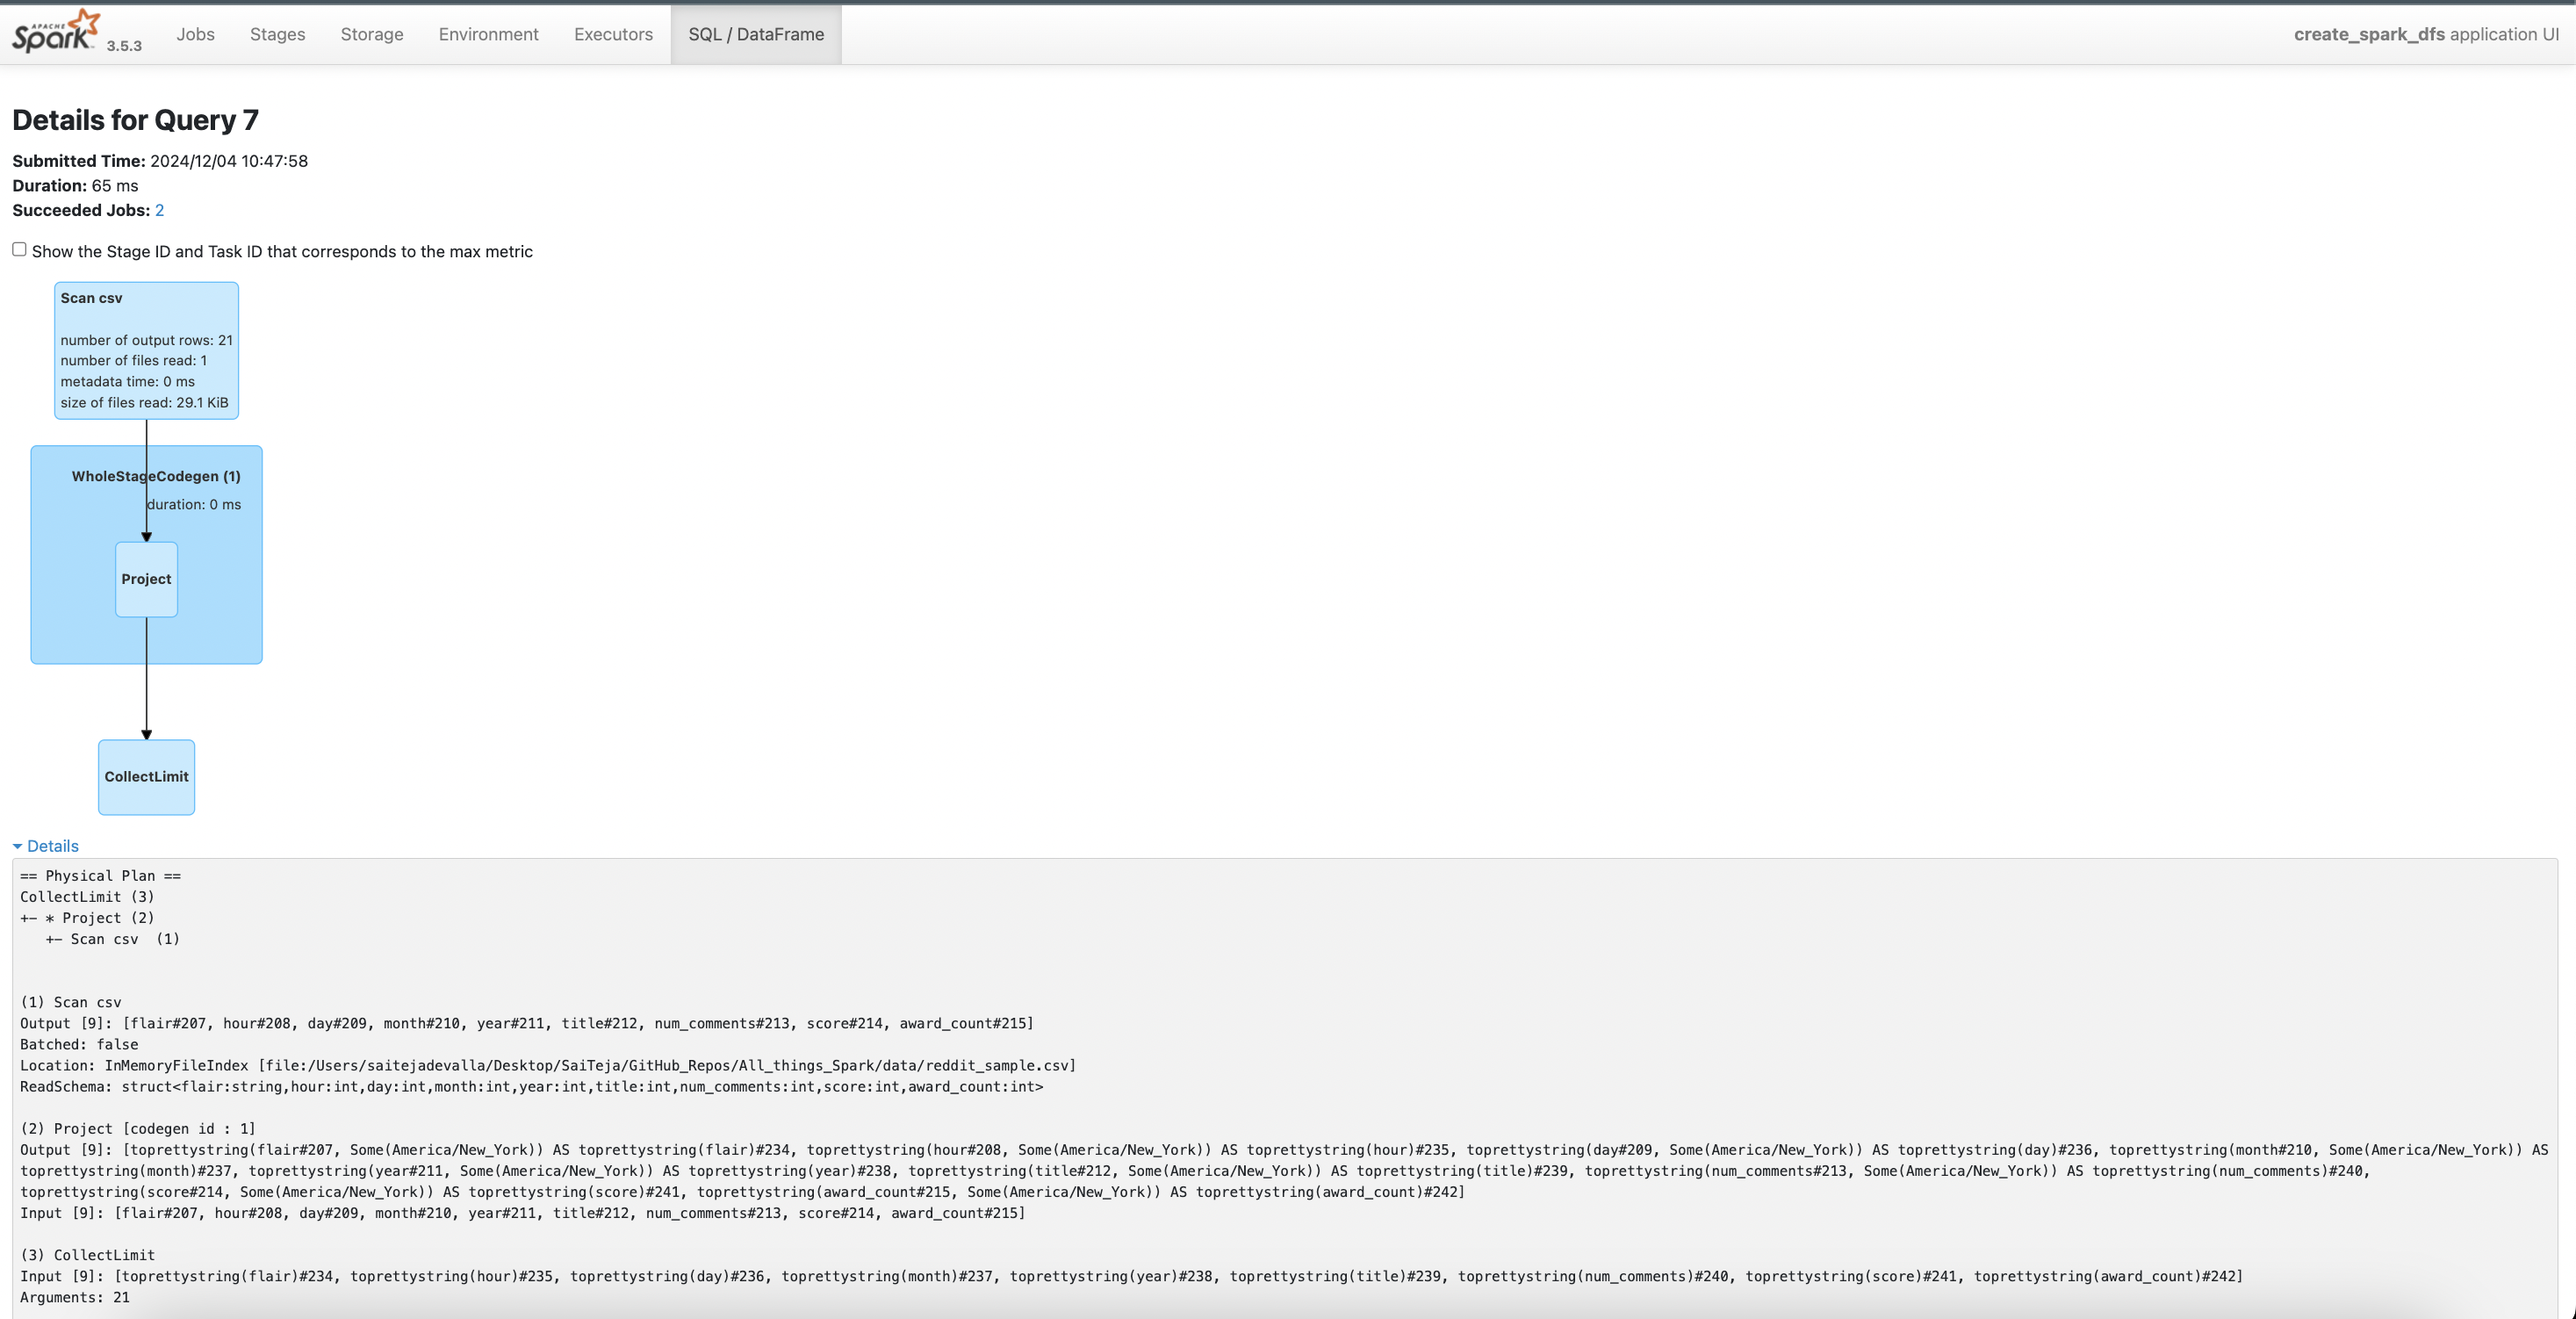

In [22]:
from IPython.display import Image
Image(filename='UI_screenshots/creating_dfs/df-1-2.png',width=1100,height=10)

2 query plans for each dataframe
- ID 6: scan text - Preliminary file reading and schema inference  
- TD 7: scan csv - Actual data reading and formatting for showing  

In [23]:
spark.stop()